### [ Scatter(산점도) Plot 살펴보기 ]
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화 하는 그래프
- corr() 

In [116]:
import pandas as pd
import numpy as np

In [117]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [118]:
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [119]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [120]:
df.corr(numeric_only=True, min_periods=3)

,dogs,cats
dogs,1.0,NaN
cats,NaN,1.0


(2) 데이터 준비

In [121]:
file = '../DATA/auto+mpg/auto-mpg.csv'

In [122]:
mpgDF = pd.read_csv(file, sep='\s+', 
                   names= ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])

In [123]:
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


(4) 데이터 정보 확인

In [124]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입

In [125]:
for c in mpgDF.columns:
    print(mpgDF[c].nunique(), mpgDF[c].unique(), sep='\n', end='\n\n')

129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

5
[8 4 6 3 5]

82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171

In [126]:
# dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
for c in mpgDF.columns:
    print(mpgDF[c].nunique(dropna=False), mpgDF[c].unique(), sep='\n', end='\n\n')

129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

5
[8 4 6 3 5]

82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171

(5) 데이터 전처리
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체크
- 이상치 체크 => 정말 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

In [127]:
mpgDF.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [128]:
mpgDF.horsepower.value_counts()['?']

6

In [129]:
mpgDF['horsepower'].replace('?', np.nan, inplace=True)

In [130]:
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [131]:
mpgDF.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


(5-2) 데이터 표준화 => horsepower의 자료형을 실제 데이터와 일치
- 46 ~ 230 범위 실수 수치값 ===> 저출력 / 중출력 / 고출력

In [132]:
mpgDF['horsepower'] = mpgDF.horsepower.astype('float32')
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float32
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float32(1), float64(4), int64(3), object(1)
memory usage: 26.6+ KB


(5-2) 데이터 표준화 => 연속형 즉 수치 자료형 ----> 범주형 자료형 변환

In [133]:
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [134]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [135]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=['A', 'B', 'C'])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [136]:
pd.cut(mpgDF.horsepower, bins=3, labels=['저마력', '중마력', '고마력'], retbins=True)

(0      중마력
 1      중마력
 2      중마력
 3      중마력
 4      중마력
       ... 
 393    저마력
 394    저마력
 395    저마력
 396    저마력
 397    저마력
 Name: horsepower, Length: 398, dtype: category
 Categories (3, object): ['저마력' < '중마력' < '고마력'],
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [137]:
out, ret=pd.cut(mpgDF.horsepower, bins=3, labels=['저마력', '중마력', '고마력'], retbins=True)
type(out), ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [138]:
mpgDF.horsepower = out
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [139]:
s = pd.Series(list('abca'))

In [140]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


(5-3) 데이터 표준화 => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding 방식

In [141]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 ==> 1,2,3 범주

In [142]:
pd.get_dummies(mpgDF.origin)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [143]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 ==> 'USA', 'EU', JP' 변환

In [144]:
mpgDF['origin'].replace({1:'USA', 2:'EU', 3:'JP'}, inplace=True)

In [145]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin            object
car name          object
dtype: object

In [146]:
mpgDF['origin'] = mpgDF['origin'].astype('category')
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석

(6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [147]:
# 상관계수 수치화 확인
corrDF = mpgDF.corr(numeric_only=True)
corrDF.mpg[1:].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

### 시각화로 연비 mpg 컬럼의 관계 확인

In [148]:
import matplotlib.pyplot as plt

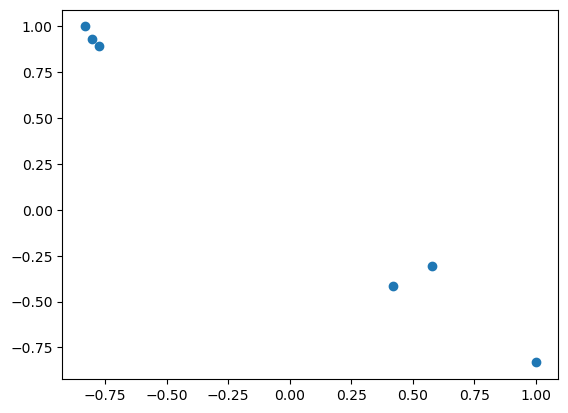

In [149]:
plt.scatter(corrDF['mpg'], corrDF['weight'])

In [153]:
corrDF['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

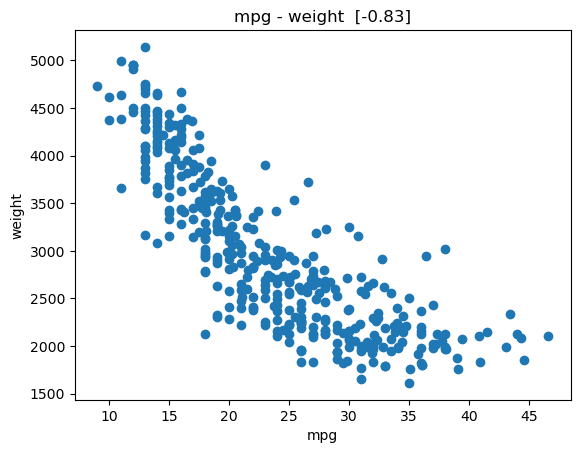

In [160]:
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title(f'mpg - weight  [{round(corrDF.mpg["weight"], 2)}]')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

In [161]:
def printscatter(col1, col2):
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f'{col1} - {col2}  [{round(corrDF[col1][col2], 2)}]')
    plt.xlabel(xlabel=col1)
    plt.ylabel(ylabel=col2)
    plt.show()

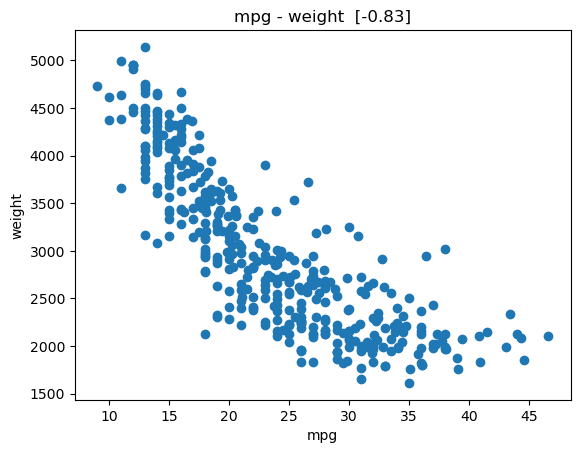

In [162]:
printscatter('mpg', 'weight')

(6-2) 자동차 제조사의 데이터 비율

In [165]:
originSR= mpgDF['origin'].value_counts()
originSR

USA    249
JP      79
EU      70
Name: origin, dtype: int64

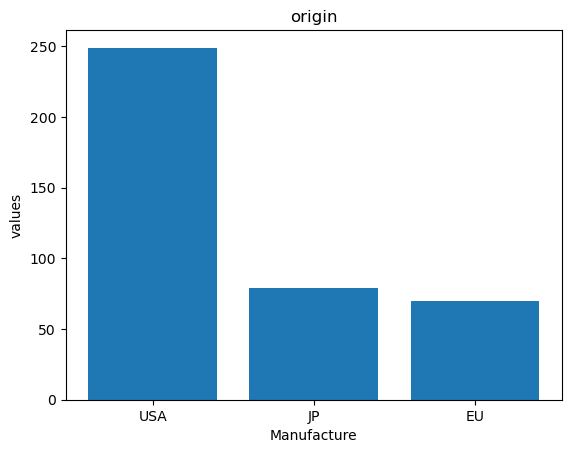

In [170]:
plt.bar(originSR.index, originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

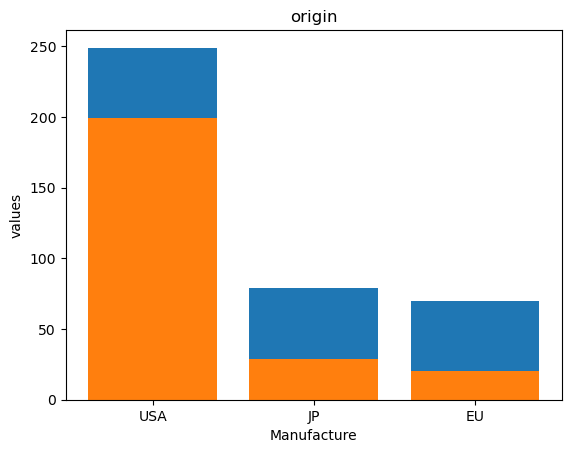

In [173]:
plt.bar(originSR.index, originSR.values)
plt.bar(originSR.index, originSR.values-50)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

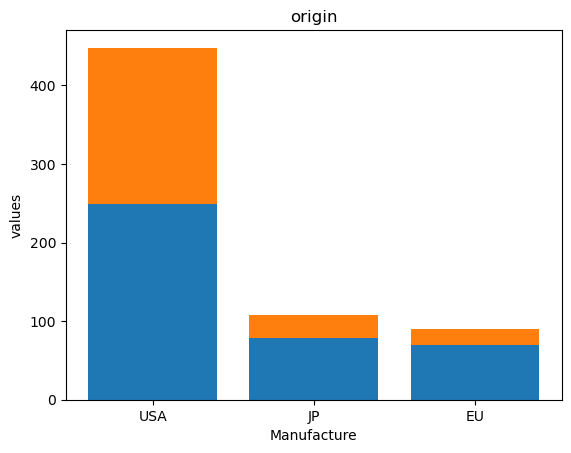

In [174]:
plt.bar(originSR.index, originSR.values)
plt.bar(originSR.index, originSR.values-50, bottom=originSR.values)
plt.title('origin')
plt.xlabel('Manufacture')
plt.ylabel('values')
plt.show()

- 다중 그래프
  
- 방법 1) fig, ax = plt.subplots()  
- 방법 2) plt.subplot(행, 열, 인) plt.subplot(3, 1, 1), plt.subplot(3, 1, 2), plt.subplot(3, 1, 3)

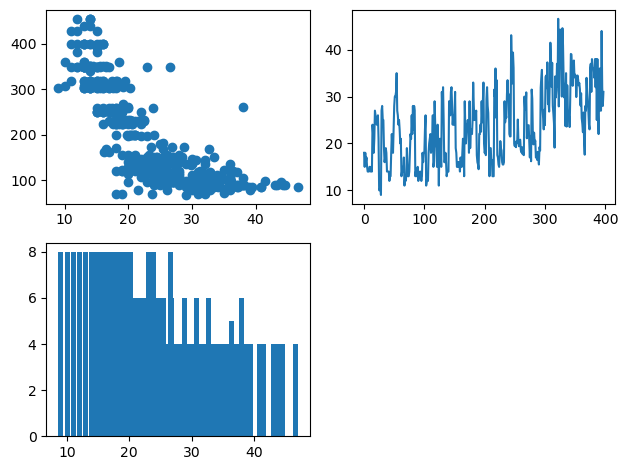

In [181]:
plt.subplot(2, 2, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])

plt.subplot(2, 2, 2)
plt.plot(mpgDF['mpg'])

plt.subplot(2, 2, 3)
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])

plt.tight_layout()    # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수

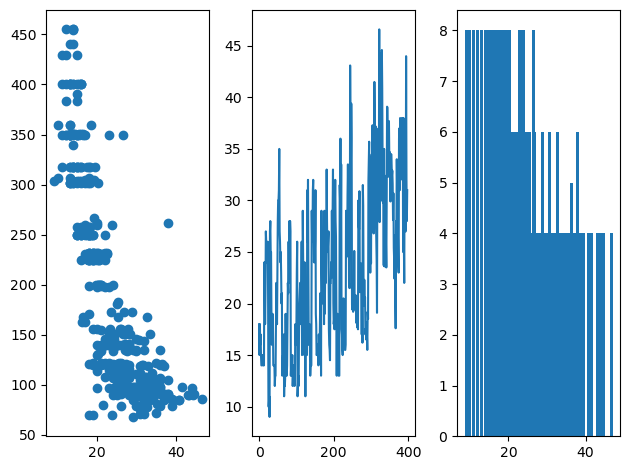

In [182]:
plt.subplot(1, 3, 1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])

plt.subplot(1, 3, 2)
plt.plot(mpgDF['mpg'])

plt.subplot(1, 3, 3)
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])

plt.tight_layout()    # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수

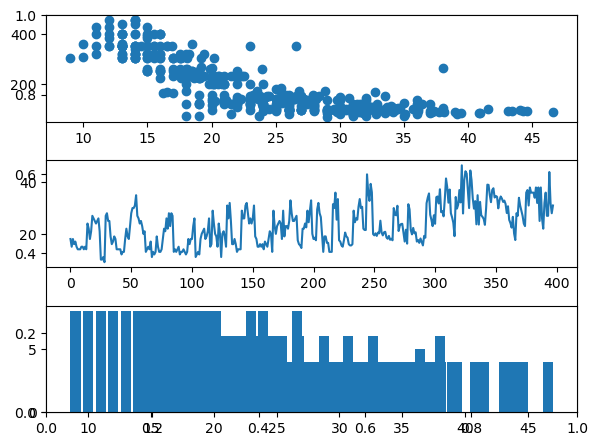

In [184]:
fig, ax  = plt.subplots()

ax1 = fig.add_subplot(311)
ax1.scatter(mpgDF['mpg'], mpgDF['displacement'])

ax2 = fig.add_subplot(312)
ax2.plot(mpgDF['mpg'])

ax3 = fig.add_subplot(313)
ax3.bar(mpgDF['mpg'], mpgDF['cylinders'])

plt.tight_layout()    # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수

Text(0.5, 1.0, 'Simple plot')

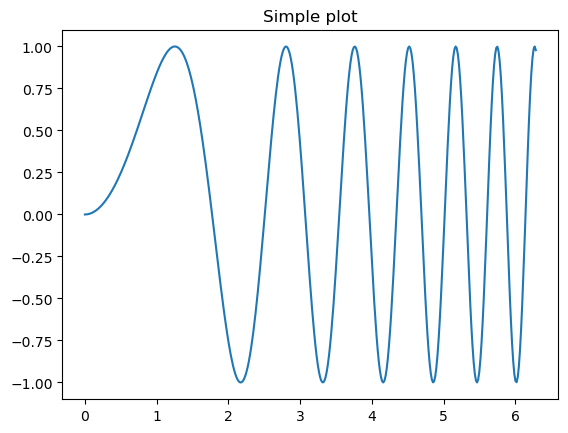

In [185]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


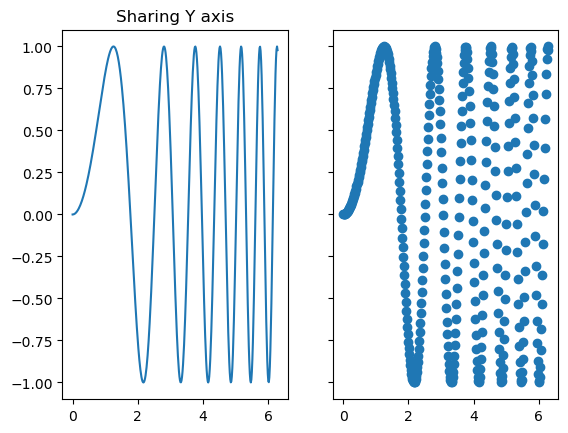

In [186]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

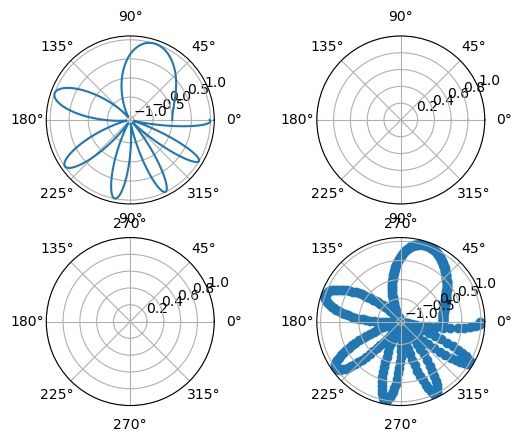

In [187]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

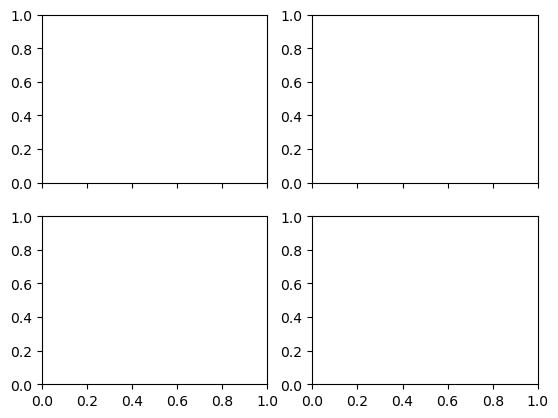

In [188]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

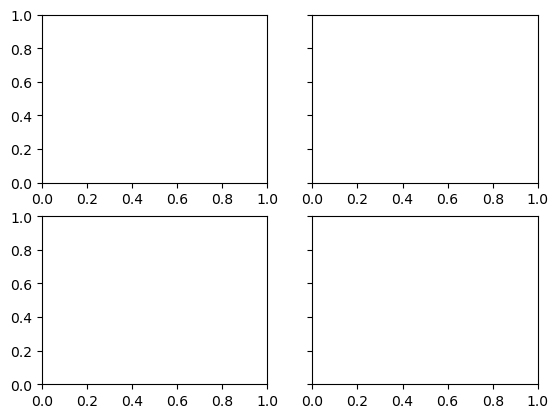

In [189]:
# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

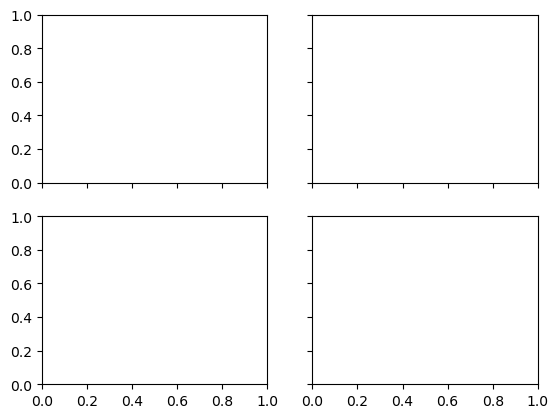

In [190]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

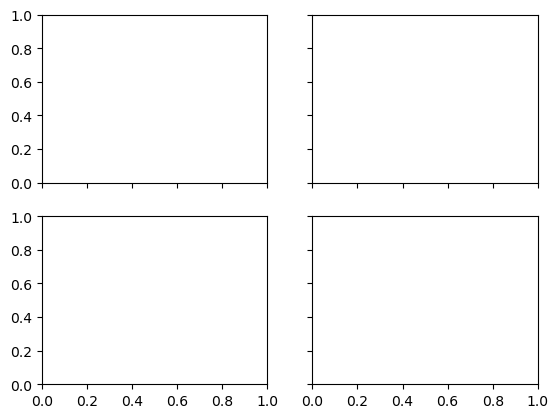

In [191]:
# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

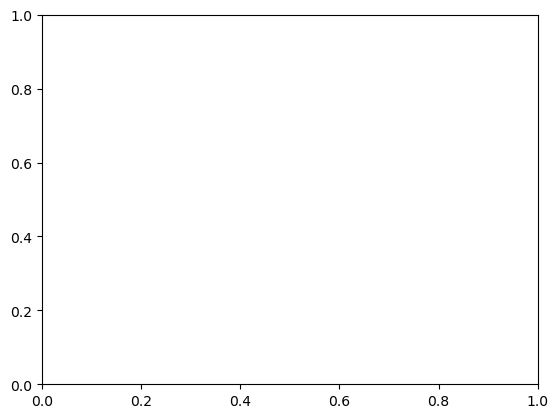

In [192]:
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)